In [1]:
# INF2178 A2
# Name: Yuyang Liu
# Student ID: 1005965617

In [2]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# Load the Excel dataset for Assignment 2
df = pd.read_excel('INF2178_A2_data.xlsx', sheet_name='ChildCareCentres')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=fe4468f162c53ea56db0328a4c55c3f825c11cd6934003903fd033eb833d032c
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


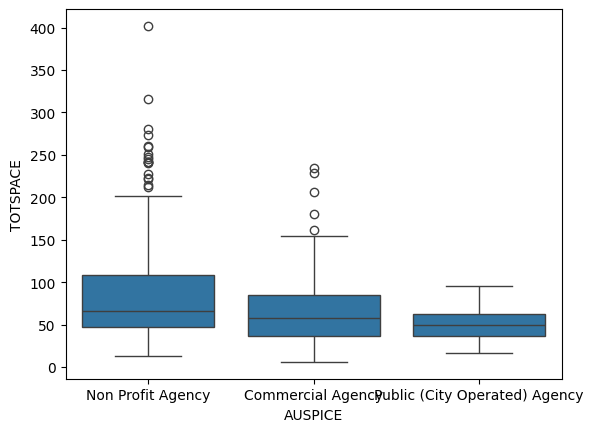

In [3]:
# One-Way ANOVA Test: Generate a boxplot to see the data distribution by AUSPICE
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df)
plt.show()

In [4]:
# Conduct one-way ANOVA test to see the effect of auspice on total child care capacity
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [5]:
#Post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


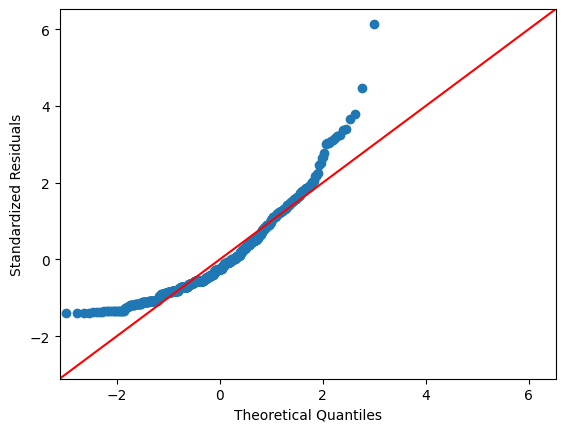

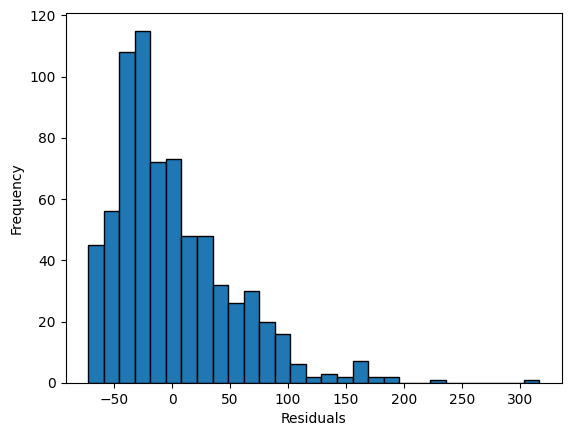

In [6]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Plot histogram of residuals
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [7]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [8]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


<Axes: xlabel='AUSPICE', ylabel='TOTSPACE'>

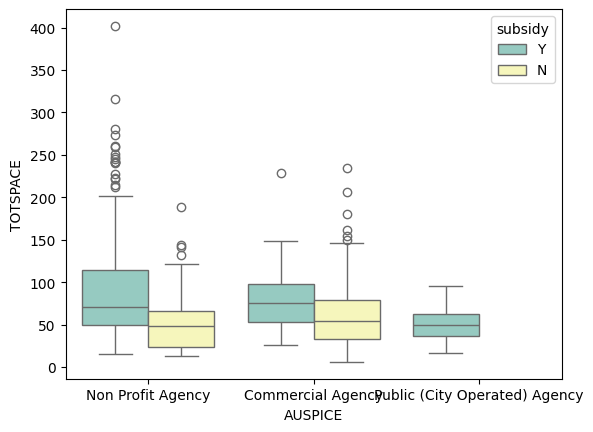

In [9]:
# Two-Way ANOVA Test: construct a boxplot to see data distribution
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=df, palette="Set3")

In [10]:
# Two-Way ANOVA Test
model2 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


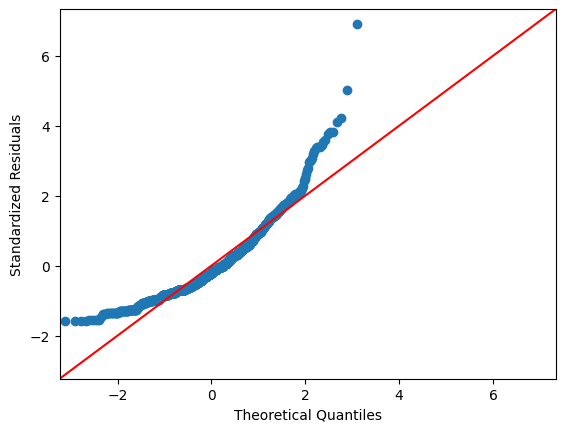

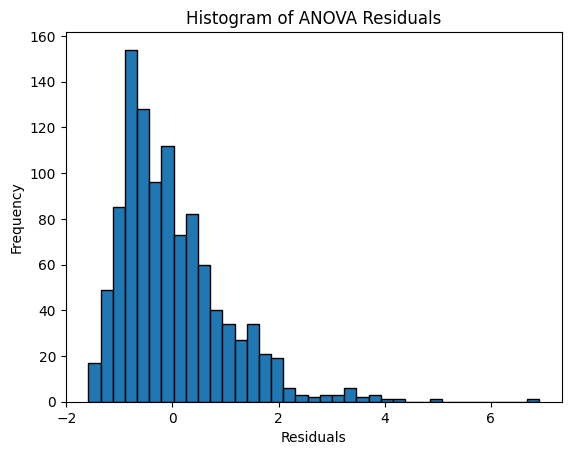

0.9018619656562805 1.5311055543621852e-25


In [11]:
# Extract residuals
residuals_2 = model2.resid

# Standardize the residuals
standardized_residuals_2 = residuals_2 / residuals_2.std()

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(standardized_residuals_2, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(standardized_residuals_2, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(residuals_2)
print(w,pvalue)

In [12]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
# Perform Levene's test
statistic, p_value = stats.levene(
    *[
        group['TOTSPACE'].values
        for name, group in df.groupby(['AUSPICE', 'subsidy'])
        ]
    )

print('Levene’s test statistic:', statistic)
print('Levene’s test p-value:', p_value)

Levene’s test statistic: 12.984714966192847
Levene’s test p-value: 2.51515889994611e-10


In [13]:
#Post-hoc test using Tukey's HSD
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.986164,25.584897,64.387430,9.370204,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.145138,-28.465689,28.755965,0.020500,0.900000
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.370552,11.192465,45.548638,6.674107,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.752830,8.307960,73.197700,5.075887,0.004757
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000


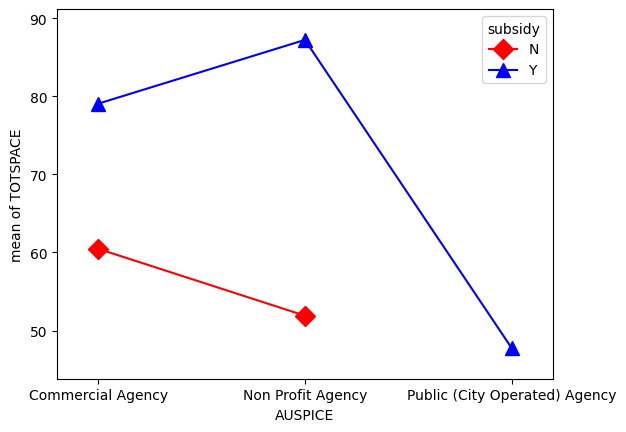

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Create interaction plot
fig, ax = plt.subplots()
fig = interaction_plot(x=df['AUSPICE'], trace=df['subsidy'], response=df['TOTSPACE'],
                       colors=["red","blue"], markers=["D","^"], ms=10, ax=ax)

<Axes: xlabel='AUSPICE', ylabel='TOTSPACE'>

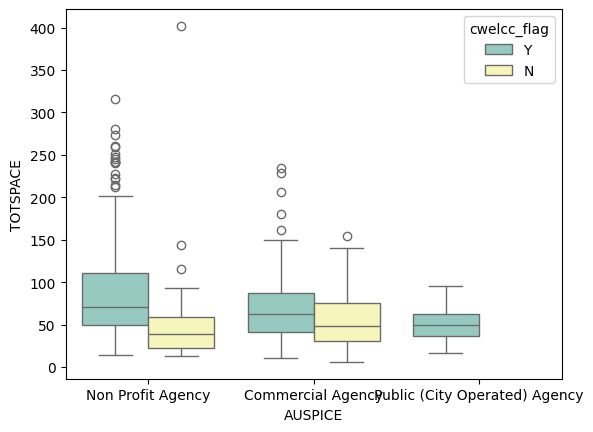

In [15]:
# Two-Way ANOVA Test: construct a boxplot to see data distribution
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="cwelcc_flag",data=df, palette="Set3")

In [16]:
# Two-Way ANOVA Test
model3 = ols('TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)', data=df).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
anova_table3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),1.083348e+05,2.0,25.188746,6.095400e-07
C(cwelcc_flag),3.768832e+04,1.0,17.525698,3.070092e-05
C(AUSPICE):C(cwelcc_flag),2.949561e+04,2.0,6.857975,1.098398e-03
Residual,2.275187e+06,1058.0,NaN,NaN


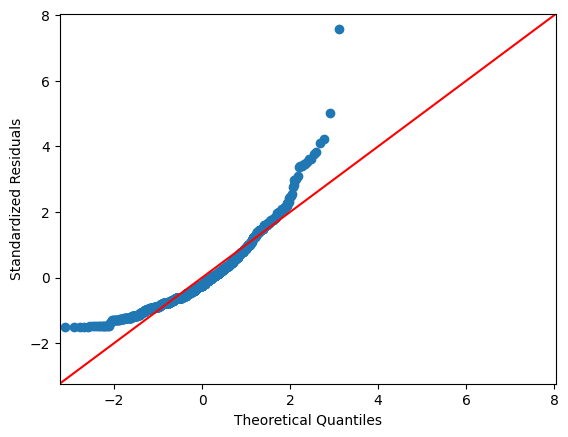

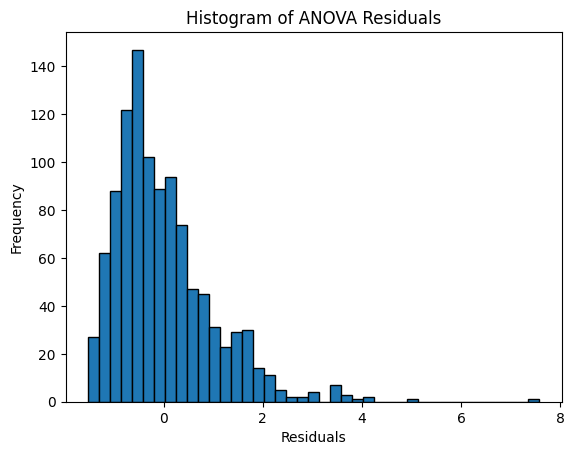

0.8972285389900208 4.5834627426744554e-26


In [17]:
# Extract residuals
residuals_3 = model3.resid

# Standardize the residuals
standardized_residuals_3 = residuals_3 / residuals_3.std()

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(standardized_residuals_3, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(standardized_residuals_3, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(residuals_3)
print(w,pvalue)

In [18]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
# Perform Levene's test
statistic, p_value = stats.levene(
    *[
        group['TOTSPACE'].values
        for name, group in df.groupby(['AUSPICE', 'cwelcc_flag'])
        ]
    )

print('Levene’s test statistic:', statistic)
print('Levene’s test p-value:', p_value)

Levene’s test statistic: 10.026555760700413
Levene’s test p-value: 5.754326496635005e-08


In [19]:
#Post-hoc test using Tukey's HSD
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var='cwelcc_flag',anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','cwelcc_flag'], anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",31.483813,4.510872,58.456754,4.716927,0.011515
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",15.792764,-2.624464,34.209991,3.465246,0.140465
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",24.032200,-1.788679,49.853080,3.761168,0.085078
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",37.832200,4.565676,71.098725,4.595728,0.015278
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000


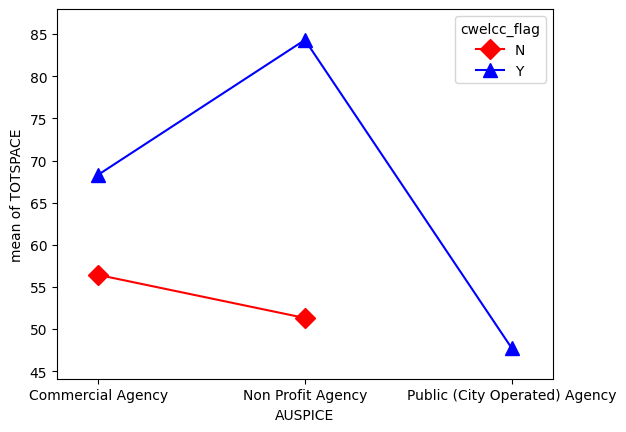

In [20]:
# Create interaction plot
fig, ax = plt.subplots()
fig = interaction_plot(x=df['AUSPICE'], trace=df['cwelcc_flag'], response=df['TOTSPACE'],
                       colors=["red","blue"], markers=["D","^"], ms=10, ax=ax)